In [2]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import monte_carlo_experiment

Исследование $T^{knn}$ в зависимости от параметра распределения

In [3]:
#Фиксируем параметры процедуры построения графа
K = 4          # число соседей для knn
n_sampels = 100     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'knn'  # тип графа 
LAMBDA = 1


In [ ]:
lambdas = np.arange(0.2, 20.2, 0.2) #сгенерировали набор лямбд 
results_with_variable_lambda = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l
         }

    results_with_variable_lambda[l] = monte_carlo_experiment(params, n_sampels)

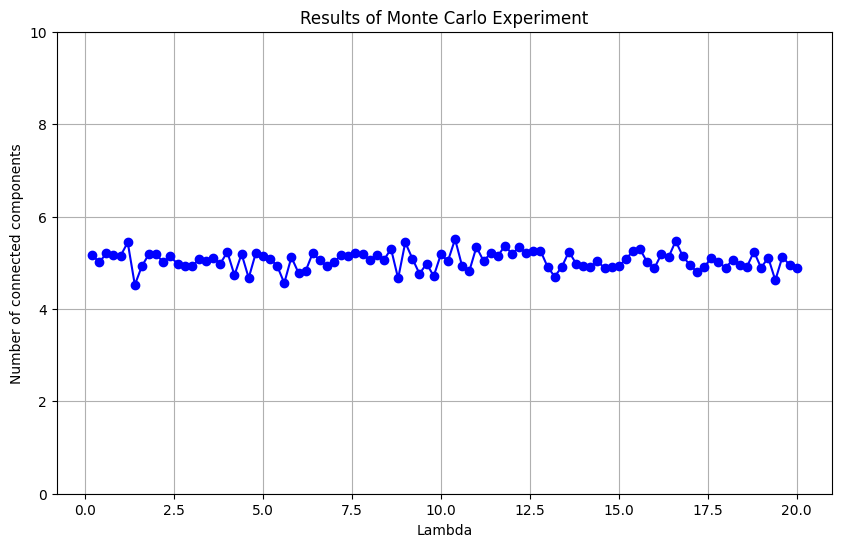

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_lambda.keys(), results_with_variable_lambda.values(), marker='o', linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Number of connected components')
plt.ylim(0, 10)
plt.grid()
plt.show()

Как мы видим, число компонент связности почти не зависит от параметра lambda.

Посмотрим, как оно зависит от k -- числа соседей для knn.

In [ ]:
number_neighbors = np.arange(1, 15, 1) #сгенерировали набор лямбд 
results_with_variable_k = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'lambda': LAMBDA
         }

    results_with_variable_k[k] = monte_carlo_experiment(params, n_sampels)

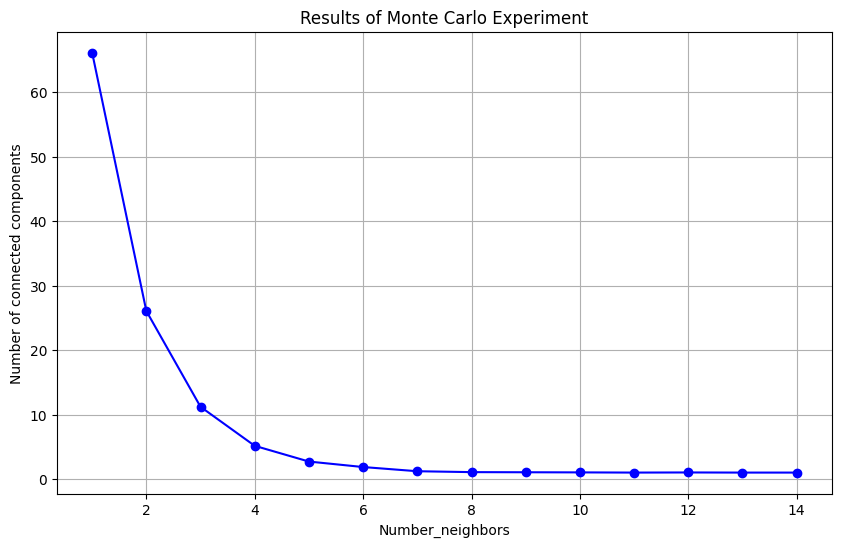

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_k.keys(), results_with_variable_k.values(), marker='o', linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

Как мы видим, при увеличении k число компонент связности уменьшается.

Посмотрим, как оно зависит от n -- размера генерируемых данных.

In [ ]:
data_size = np.arange(10, 1000, 10) #сгенерировали набор лямбд 
results_with_variable_n = {}


for n in tqdm(data_size, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': n,
            'x': K,
            'lambda': LAMBDA
         }

    results_with_variable_n[n] = monte_carlo_experiment(params, n_sampels)

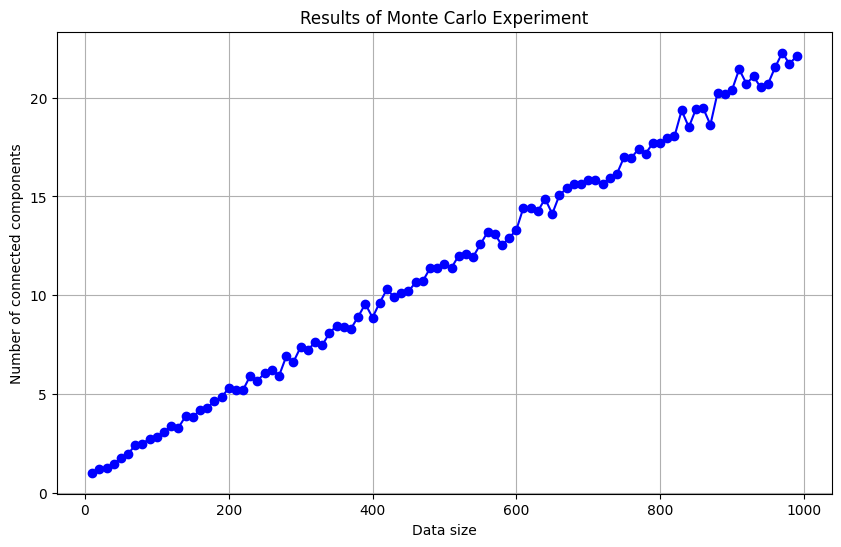

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_n.keys(), results_with_variable_n.values(), marker='o', linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Number of connected components')
plt.grid()
plt.show()

Как мы видим, число компонент связности возрастает с увеличением размера выборки.